In [1]:
import os
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from time import sleep
from IPython import display

In [2]:
!pwd

/home/cm/mountpts/F/DAIICT/SEM 2/Numerical Methods/Plasma-Classification


In [3]:
DIR="/home/cm/mountpts/F/DAIICT/SEM 2/Numerical Methods/Plasma-Classification/NM_PRUJECT_WITH_MS"

In [4]:
all_folds=os.listdir(DIR)
all_folds.sort()

In [5]:
LOC=DIR+"/"+all_folds[11]

In [6]:
LOC

'/home/cm/mountpts/F/DAIICT/SEM 2/Numerical Methods/Plasma-Classification/NM_PRUJECT_WITH_MS/9383'

In [7]:
all_files=os.listdir(LOC)
all_files.sort()

In [30]:
%%timeit
norm_row=[]
for i in range(img.shape[0]):
    buff=0
    for j in range(img.shape[1]):
        if img[i,j]>0:
            buff+=img[i,j]
    norm_row.append(buff)
max(norm_row)

78.4 ms ± 1.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
%%timeit
vec=np.array([1 for i in range(img.shape[1])])
max(img.dot(vec))

117 µs ± 3.35 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [34]:
vec=np.array([1 for i in range(img.shape[0])])
max(img.T.dot(vec))

921

In [17]:
LOC=DIR+"/"+all_folds[11]
all_files=os.listdir(LOC)
all_files.sort()

In [18]:
LOC

'/home/cm/mountpts/F/DAIICT/SEM 2/Numerical Methods/Plasma-Classification/NM_PRUJECT_WITH_MS/9383'

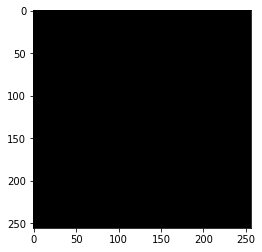

Plasma is not touching surface!


In [8]:
img = cv2.imread(LOC+"/"+all_files[10],cv2.IMREAD_GRAYSCALE) 
vecR=np.array([1 for i in range(img.shape[1])])
vecC=np.array([1 for i in range(img.shape[0])])
for i in all_files:
    img = cv2.imread(LOC+"/"+i,cv2.IMREAD_GRAYSCALE)
    ret,img = cv2.threshold(img,50,255,cv2.THRESH_TOZERO)
    plt.imshow(img,cmap=plt.get_cmap('gray'))
    plt.show()
    
    norm_row=img.dot(vecR)
    norm_col=img.T.dot(vecC)
    
    if max(norm_row)>100 or max(norm_col)>100:
        print("Plasma is touching surface!")
    else:
        print("Plasma is not touching surface!")
    display.clear_output(wait=True)

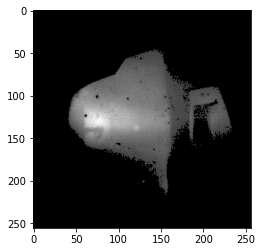

Plasma is touching surface!
Plasma is not moving!
Plasma's Area: 0.2306976318359375


KeyboardInterrupt: 

In [9]:
LOC=DIR+"/"+all_folds[11]
all_files=os.listdir(LOC)
all_files.sort()

img = cv2.imread(LOC+"/"+all_files[0],cv2.IMREAD_GRAYSCALE)
totalPix=img.shape[0]*img.shape[1]
buff_row=[img.shape[0]/2,img.shape[0]/2]
buff_col=[img.shape[1]/2,img.shape[1]/2]
vecR=np.array([1 for i in range(img.shape[1])])
vecC=np.array([1 for i in range(img.shape[0])])
for i in all_files:
    DOWNDIR=False
    RIGHTDIR=False
    UP=0
    DOWN=0
    LEFT=0
    RIGHT=0
    img = cv2.imread(LOC+"/"+i,cv2.IMREAD_GRAYSCALE)
    ret,img = cv2.threshold(img,50,255,cv2.THRESH_TOZERO)
    ret,imgB = cv2.threshold(img,50,255,cv2.THRESH_BINARY)
    plt.imshow(img,cmap=plt.get_cmap('gray'))
    plt.show()

    norm_row=img.dot(vecR)
    norm_col=img.T.dot(vecC)


    if max(norm_row)>100 or max(norm_col)>100:
        print("Plasma is touching surface!")
        for j in range(norm_row.shape[0]):
            if not DOWNDIR:
                if norm_row[j]!=0:
                    if j<buff_row[0]:
                        UP+=1
                    elif j==buff_row[0]:
                        pass
                    elif j>buff_row[0]:
                        UP-=1
                    buff_row[0]=j
                    DOWNDIR=True
            if DOWNDIR:
                if norm_row[j]==0:
                    if j>buff_row[1]:
                        DOWN+=1
                    elif j==buff_row[1]:
                        pass
                    elif j<buff_row[1]:
                        DOWN-=1
                    buff_row[1]=j
                    break
        for j in range(norm_col.shape[0]):
            if not RIGHTDIR:
                if norm_col[j]!=0:
                    if j<buff_col[0]:
                        LEFT+=1
                    elif j==buff_col[0]:
                        pass
                    elif j>buff_row[0]:
                        LEFT-=1
                    buff_col[0]=j
                    RIGHTDIR=True
            if RIGHTDIR:
                if norm_col[j]==0:
                    if j>buff_col[1]:
                        RIGHT+=1
                    elif j==buff_col[1]:
                        pass
                    elif j<buff_row[1]:
                        RIGHT-=1
                    buff_col[1]=j
                    break
        if (UP+DOWN+LEFT+RIGHT)==0:
            print("Plasma is not moving!")
        else:
            if (UP>0) and (DOWN>0) and (LEFT>0) and (RIGHT>0):
                print("Plasma is Expanding!")
            elif (UP<0) and (DOWN<0) and (LEFT<0) and (RIGHT<0):
                print("Plasma is Contracting!")
            else:
                if (UP>0) and (DOWN>0):
                    print("Plasma is expanding vertically!")
                elif ((UP>0) and (DOWN==0)):
                    print("Plasma is expanding in Upwards direction!")
                elif ((UP==0) and (DOWN>0)):
                    print("Plasma is expanding in Downwards direction!")
                elif ((UP<0) and (DOWN==0)):
                    print("Plasma is contracting in Upwards direction!")
                elif ((UP==0) and (DOWN<0)):
                    print("Plasma is contracting in Downwards direction!")
                elif (UP<0) and (DOWN<0):
                    print("Plasma is contracting vertically!")
                elif (UP>0) and (DOWN<=0):
                    print("Plasma is moving UP!")
                elif (UP<=0) and (DOWN>0):
                    print("Plasma is moving DOWN!")

                if (LEFT>0) and (RIGHT>0):
                    print("Plasma is expanding horizontally!")
                elif ((LEFT>0) and (RIGHT==0)):
                    print("Plasma is expanding in LEFT direction!")
                elif ((LEFT==0) and (RIGHT>0)):
                    print("Plasma is expanding in RIGHT direction!")
                elif ((LEFT<0) and (RIGHT==0)):
                    print("Plasma is contracting in LEFT direction!")
                elif ((LEFT==0) and (RIGHT<0)):
                    print("Plasma is contracting in RIGHT direction!")
                elif (LEFT<0) and (RIGHT<0):
                    print("Plasma is contracting horizontally!")
                elif (LEFT>0) and (RIGHT<=0):
                    print("Plasma is moving LEFT!")
                elif (LEFT<=0) and (RIGHT>0):
                    print("Plasma is moving RIGHT!")

        imgB=np.multiply(((1/255)*np.ones(imgB.shape)),imgB)
        print("Plasma's Area:",sum(sum(imgB))/totalPix)
        sleep(1)
        
    else:
        print("Plasma is not touching surface!")
    display.clear_output(wait=True)

In [17]:
from PIL import Image
img = Image.open(LOC+"/"+all_files[-1]).convert('LA')
# img.save('greyscale.png')

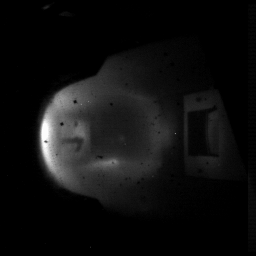

In [12]:
img